In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [22]:
# with open("./dataset/Sarcasm_Headlines_Dataset.json", 'r') as f:
#     datastore = json.load(f)

datastore = [json.loads(line) for line in open('./dataset/Sarcasm_Headlines_Dataset_v2.json', 'r')]

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [23]:
print(len(datastore))

28619


In [24]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [25]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [26]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6538 - accuracy: 0.5973 - val_loss: 0.5285 - val_accuracy: 0.7884
Epoch 2/30
625/625 - 2s - loss: 0.4105 - accuracy: 0.8414 - val_loss: 0.3839 - val_accuracy: 0.8289
Epoch 3/30
625/625 - 2s - loss: 0.3012 - accuracy: 0.8844 - val_loss: 0.3454 - val_accuracy: 0.8479
Epoch 4/30
625/625 - 2s - loss: 0.2495 - accuracy: 0.9039 - val_loss: 0.3319 - val_accuracy: 0.8569
Epoch 5/30
625/625 - 2s - loss: 0.2145 - accuracy: 0.9188 - val_loss: 0.3361 - val_accuracy: 0.8542
Epoch 6/30
625/625 - 2s - loss: 0.1881 - accuracy: 0.9297 - val_loss: 0.3496 - val_accuracy: 0.8532
Epoch 7/30
625/625 - 2s - loss: 0.1666 - accuracy: 0.9401 - val_loss: 0.3802 - val_accuracy: 0.8434
Epoch 8/30
625/625 - 2s - loss: 0.1478 - accuracy: 0.9471 - val_loss: 0.3842 - val_accuracy: 0.8458
Epoch 9/30
625/625 - 2s - loss: 0.1334 - accuracy: 0.9527 - val_loss: 0.4052 - val_accuracy: 0.8465
Epoch 10/30
625/625 - 2s - loss: 0.1207 - accuracy: 0.9585 - val_loss: 0.4405 - val_accuracy: 0.8386

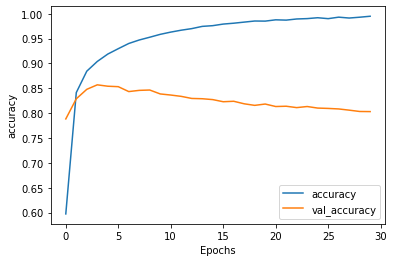

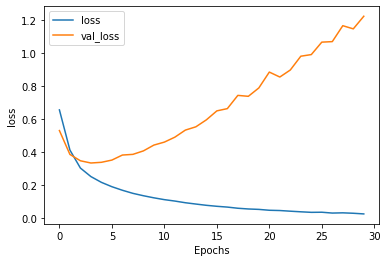

In [29]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [34]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[7.957976e-01]
 [8.306267e-11]]


In [36]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

ValueError: too many values to unpack (expected 2)